## Random forest implementaion

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

import feather

## INPUT FILE PATH BELOW

In [3]:
#for Olivier
#PATH = "/GitHub/MENINGIOMA_QuantitativeModeling/data/custom/"
PATH = "data/UCSF/custom/"

In [4]:
!ls {PATH}

rf_pre_surgical_data.zip  rf_X_train  rf_y_train


In [5]:
RF_train = feather.read_dataframe(PATH + "/rf_X_train")
RF_Y = feather.read_dataframe(PATH + "/rf_y_train")

In [6]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)

In [7]:
display_all(RF_train.transpose())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
AGE,61.30,55.70,37.9,39.0,70.40,72.20,69.60,51.70,56.30,34.90,55.90,68.70,57.1,69.10,48.80,29.60,61.70,43.30,47.00,30.70,57.10,45.70,47.40,59.10,64.60,57.70,22.90,25.3,69.40,64.80,47.20,78.20,46.80,42.60,67.20,45.70,75.20,75.5,70.90,49.00,62.70,57.40,54.40,54.70,37.90,32.50,61.10,21.00,76.30,48.20,79.30,58.20,54.60,80.90,79.50,43.10,64.40,63.30,63.30,43.7,44.30,50.80,45.60,57.30,49.20,59.00,65.60,49.30,53.90,73.60,63.50,83.10,60.30,38.10,52.80,88.60,54.80,66.30,43.50,57.30,59.30,55.30,76.90,65.40,60.50,72.40,53.50,68.40,64.90,61.30,62.90,64.60,74.90,62.50,68.20,73.00,49.60,73.30,56.50,57.90,44.50,68.10,56.90,69.40,68.60,72.40,72.6,68.20,72.80,35.90,68.20,50.70,47.7,37.80,66.60,52.7,67.50,25.50,61.10,55.10,55.20,59.30,54.40,47.80,58.40,48.40,48.2,36.90,53.70,70.40,60.00,43.20,73.50,35.8,65.90,63.20,77.20,66.50,30.50,50.10,66.00,57.00,77.60,63.90,60.40,58.70,67.50,39.30,67.30,63.10,58.80,81.1,48.50,67.20,36.50,72.10,67.7,74.00,56.30,68.30,73.30,41.30,65.40,71.00,64.00,64.4,35.00,70.10,54.90,44.80,80.40,57.90,70.70,49.70,54.40,27.00,60.50,56.30,52.2,67.80,53.90,74.30,60.60,54.70,52.7,58.00,39.20,45.70,54.7,65.30,74.70,61.70,58.30,53.4,56.80,64.10,54.20,75.20,64.20,46.10,75.80,50.60,57.20,57.10,45.60,59.60,40.10,86.50,67.60,42.4,61.80,79.70,65.00,70.30,74.70,78.10,61.40,48.30,44.00,80.6,75.20,39.00,61.90,13.70,79.7,54.70,79.8,55.80,61.10,60.9,58.60,73.00,47.70,50.10,50.00,54.50,68.3,64.1,74.00,56.50,56.60,64.40,58.10,81.20,47.30,45.40,48.90,76.30,50.80,58.10,57.20,51.00,37.60,43.80,31.60,47.00,27.40
SEX,1.00,2.00,1.0,2.0,1.00,1.00,1.00,2.00,1.00,1.00,2.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00,1.00,2.0,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00,2.0,1.00,1.00,2.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,2.00,1.0,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,2.00,2.00,1.00,2.00,2.00,1.00,1.00,1.00,2.00,2.00,2.00,1.00,1.00,2.00,2.00,1.00,1.00,1.00,2.00,1.00,2.00,2.00,1.00,1.00,1.00,2.00,2.00,2.00,2.00,1.00,1.00,1.00,1.00,1.0,2.00,2.00,1.00,2.00,1.00,1.0,1.00,2.00,1.0,1.00,1.00,1.00,1.00,2.00,2.00,1.00,1.00,1.00,1.00,2.0,1.00,1.00,1.00,2.00,1.00,1.00,1.0,1.00,1.00,2.00,1.00,2.00,2.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,1.0,2.00,1.00,2.00,2.00,1.0,1.00,1.00,2.00,1.00,1.00,1.00,2.00,1.00,2.0,2.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.0,1.00,2.00,1.00,2.00,1.00,1.0,1.00,1.00,1.00,1.0,1.00,1.00,1.00,2.00,2.0,2.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00,1.00,2.00,1.00,2.0,1.00,1.00,1.00,1.00,2.00,2.00,2.00,1.00,2.00,1.0,2.00,1.00,2.00,1.00,2.0,2.00,1.0,2.00,1.00,1.0,2.00,1.00,2.00,1.00,1.00,1.00,1.0,2.0,1.00,2.00,1.00,1.00,2.00,2.00,1.00,1.00,2.00,1.00,2.00,2.00,1.00,1.00,1.00,2.00,1.00,2.00,2.00
MM,2.00,1.00,1.0,1.0,1.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,2.00,1.00,2.00,2.00,1.00,1.00,1.00,2.00,1.00,2.00,2.00,2.00,1.0,1.00,2.00,1.00,2.00,1.00,2.00,2.00,1.00,2.00,2.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,2.00,1.00,2.00,1.00,1.0

In [8]:
RF_Y

,GTR,GRADE,LF,OS
0,1,2,1,NaN
1,1,2,1,NaN
2,1,1,0,5.00
3,1,2,0,NaN
4,1,1,0,3.47
5,1,1,0,3.18
6,1,1,0,4.15
7,1,1,1,6.11
8,1,1,0,0.19
9,1,1,0,0.28


In [9]:
display_all(RF_train.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
AGE,257.0,57.963813,13.435191,13.7,49.00,58.20,67.70,88.60
SEX,257.0,1.373541,0.484688,1.0,1.00,1.00,2.00,2.00
MM,257.0,1.264591,0.441976,1.0,1.00,1.00,2.00,2.00
LOCATION,257.0,9.852140,3.899309,1.0,6.00,10.00,14.00,17.00
ACF,257.0,1.210117,0.408186,1.0,1.00,1.00,1.00,2.00
MCF,257.0,1.225681,0.418846,1.0,1.00,1.00,1.00,2.00
PCF,257.0,1.132296,0.339473,1.0,1.00,1.00,1.00,2.00
MID,257.0,1.459144,0.499300,1.0,1.00,1.00,2.00,2.00
CONVEXITY,257.0,1.610895,0.488499,1.0,1.00,2.00,2.00,2.00
SB,257.0,1.424125,0.495174,1.0,1.00,1.00,2.00,2.00


In [10]:
display_all(RF_Y.describe(include='all').transpose())


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
GTR,256.0,2.0,1.0,147.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRADE,257.0,3.0,1.0,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LF,257.0,2.0,0.0,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OS,234.0,NaN,NaN,NaN,5.181197,3.808899,0.01,1.92,4.85,8.0275,16.53


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f78192c18d0>]], dtype=object)

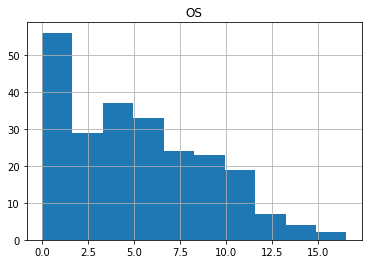

In [11]:
RF_Y.hist()

In [12]:

RF_Y_OS = RF_Y.OS

null_index = RF_Y_OS[RF_Y_OS.isnull()].index

RF_Y_OS_nonull = RF_Y_OS.drop(null_index)

RF_train_match_nonull = RF_train.drop(null_index)

RF_train_match_nonull = RF_train_match_nonull.drop('FU_LESION',axis=1)


RF_train_match_nonull.shape,RF_Y_OS_nonull.shape

((234, 81), (234,))

In [13]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(RF_train_match_nonull,RF_Y_OS_nonull)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [14]:
display_all(RF_train_match_nonull.isnull().sum().sort_index()/len(RF_train_match_nonull))

ACF             0.0
ADC             0.0
ADC_1           0.0
ADC_2           0.0
ADC_3           0.0
ADC_nan         0.0
ADJ_RT          0.0
AGE             0.0
ARTERIAL        0.0
ARTERIAL_0      0.0
ARTERIAL_1      0.0
ARTERIAL_nan    0.0
BONE            0.0
BONY            0.0
BONY_0          0.0
BONY_1          0.0
BONY_nan        0.0
BRAIN           0.0
BRAININV        0.0
BRAININV_0      0.0
BRAININV_1      0.0
BRAININV_nan    0.0
CONVEXITY       0.0
CSFCLEFT        0.0
CSFCLEFT_0      0.0
CSFCLEFT_1      0.0
CSFCLEFT_nan    0.0
CYSTNEC         0.0
CYSTNEC_0       0.0
CYSTNEC_1       0.0
CYSTNEC_nan     0.0
DURATAIL        0.0
DURATAIL_0      0.0
DURATAIL_1      0.0
DURATAIL_nan    0.0
EDEMA           0.0
FOCALITY        0.0
FOCALITY_1      0.0
FOCALITY_2      0.0
FOCALITY_nan    0.0
LOCATION        0.0
MCF             0.0
MID             0.0
MM              0.0
NECROSIS        0.0
PCF             0.0
RACE            0.0
RACE_1.0        0.0
RACE_2.0        0.0
RACE_3.0        0.0


In [15]:
# os.makedirs('tmp', exist_ok=True)
# RF_train_match_nonull.to_feather('tmp/UCSF-raw')

In [16]:
# df_raw = pd.read_feather('tmp/bulldozers-raw')

In [17]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(RF_train_match_nonull, RF_Y_OS_nonull)
m.score(RF_train_match_nonull,RF_Y_OS_nonull)

0.82378343165995771

Wow, an r^2 of 0.99 - that's great, right? Well, perhaps not...
Possibly the most important idea in machine learning is that of having separate training & validation data sets. As motivation, suppose you don't divide up your data, but instead use all of it. And suppose you have lots of parameters:

Underfitting and Overfitting
The error for the pictured data points is lowest for the model on the far right (the blue curve passes through the red points almost perfectly), yet it's not the best choice. Why is that? If you were to gather some new data points, they most likely would not be on that curve in the graph on the right, but would be closer to the curve in the middle graph.
This illustrates how using all our data can lead to overfitting. A validation set helps diagnose this problem.

In [18]:
df = RF_train_match_nonull
#y  = np.log(RF_Y_OS_nonull)   using log transform
y   = np.sqrt(RF_Y_OS_nonull)  #using sqrt transform

def split_vals(a,n): return a[:n].copy(), a[n:].copy()


n_valid = 50  
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)
X_train.shape, y_train.shape, X_valid.shape

((184, 81), (184,), (50, 81))

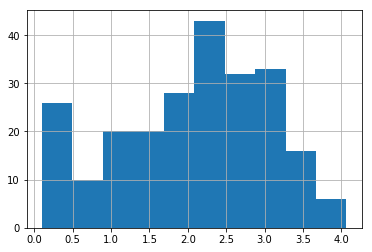

In [19]:
np.sqrt(RF_Y_OS_nonull).hist()

## Random Forests

## Base model

Let's try our model again, this time with separate training and validation sets.

In [20]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [21]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 72 ms, sys: 8 ms, total: 80 ms
Wall time: 118 ms
[0.42748591492056404, 1.0042912632529335, 0.8042065470316534, -0.08652330004625286]


An r^2 in the high-80's isn't bad at all (the RMLSE is pretty bad). this suggests we are over fitting badly lets look at a single tree to undrestand this better. 

## Single tree

In [22]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.8381497404527853, 1.043423927386736, 0.24734183810646226, -0.17284672089119904]


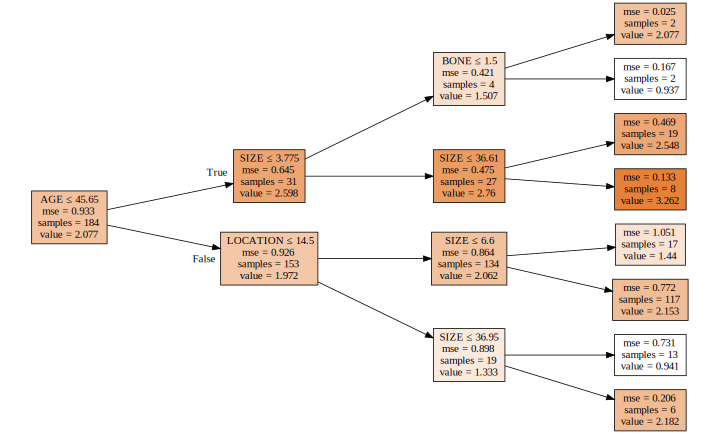

In [23]:
draw_tree(m.estimators_[0], df, precision=3)

Let's see what happnes if we create a bigger tree. 

In [24]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.0, 1.18468049280664, 1.0, -0.51189680576201879]


The training set result looks great! But the validation set is worse than our original model. This is why we need to use *bagging* of multiple trees to get more generalizable results.

## Bagging

In [25]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.41980760712921084, 0.8477711077427309, 0.81117688681243894, 0.22575769437772752]


In [26]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid.iloc[0]

(array([ 4.06571,  3.15595,  2.83549,  2.19089,  3.15595,  1.74929,  1.28062,  1.57162,  0.70711,  2.83549]),
 2.3548113348475694,
 1.7521415467935231)

In [27]:
preds.shape

(10, 50)

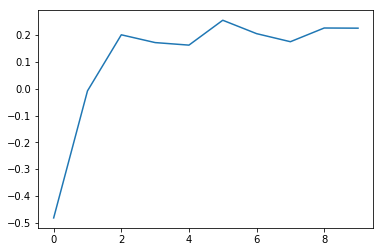

In [28]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [29]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.39089055434185616, 0.9484069134188177, 0.83629388658707693, 0.031032753553659531]


In [30]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.37138537448780334, 0.8947393605509953, 0.85222392088464394, 0.13759203180026236]


In [31]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.3679187635080039, 0.9150147304405779, 0.85496980870692751, 0.098063741739057519]


In [32]:
m = RandomForestRegressor(n_estimators=160, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.357358638552911, 0.8878845837141306, 0.86317573759319732, 0.1507555728177542]


## Out-of-bag (OOB) score


In [33]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.3714303480505284, 0.9192223475804858, 0.85218812831107793, 0.089749716116800049, -0.070339156715299556]


## Tree building parameters

In [34]:
reset_rf_samples()

In [35]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.3795442101750197, 0.8874395825347439, 0.84565971872949208, 0.1516066295306896, -0.0048251178705125408]


## Reduce 
overfittin by growing our tress less deeply. 

There are less decision rules for each leaf node; simpler models should generalize better
The predictions are made by averaging more rows in the leaf node, resulting in less volatility

In [36]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.5443411924981555, 0.886716697587013, 0.68253419989504294, 0.15298822445625715, -0.081833789399428092]


In [ ]:
## PREDICTION FOR OS
## SO FAR WE HAVE BEEN ABLE TO REDUCE RMLSE FROM 1.0042912632529335 TO .886
## AND INCREASE PREDICTOIN R^2 FROM -0.08652330004625286 TO .1529

## NEXT CROSS VALIDATION